In [2]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

client = ImageAnalysisClient(
    endpoint="https://computervisiontss1.cognitiveservices.azure.com/",
    credential="69c864f0fb24464f8497b68dd0fde7d7"
)

result = client.analyze(
    image_url=r"c:\Users\vishwas.balkundi\Downloads\detect-faces\store-camera-1.jpg",
    visual_features=[VisualFeatures.CAPTION, VisualFeatures.READ],
    gender_neutral_caption=True,
    language="en",
) 

ModuleNotFoundError: No module named 'azure.ai.vision'

In [8]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials


In [21]:
endpoint="https://computervisiontss1.cognitiveservices.azure.com/"
credential="69c864f0fb24464f8497b68dd0fde7d7"
client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(credential))

In [28]:
image_url = "C://Users//vishwas.balkundi//Downloads//detect-faces//store-camera-1.jpg"
features = ["Description" ,"Tags", "Objects"]

with open(image_url, "rb") as image_stream:
    analysis = client.analyze_image_in_stream(image_stream, visual_features=features)

In [29]:
analysis

In [30]:
print("Description:", analysis.description.captions)
print("Tags:", analysis.tags)
print("Objects:", analysis.objects)

Description: [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object at 0x00000286ED53C190>]
Tags: [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49FC70>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49F820>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49E4A0>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49FC10>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49F9D0>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49FA90>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49FAF0>, <azure.cognitiveservices.vision.computervision.models._models_py3.ImageTag object at 0x00000286ED49F5B0>, <azure.cognitiveservi

In [43]:
print("Description:")
for caption in analysis.description.captions:
    print(f"- {caption.text} (confidence: {caption.confidence:.2f})")

# Tags
print("\nTags:")
for tag in analysis.tags:
    print(f"- {tag.name} (confidence: {tag.confidence:.2f})")

# Objects
print("\nObjects:")
for detected_object in analysis.objects:
    print(f"- {detected_object.object_property} at location "
          f"- confidence: {detected_object.confidence:.2f}"
          f"({detected_object.rectangle.x}, {detected_object.rectangle.y}) with "
          f"width {detected_object.rectangle.w} and height {detected_object.rectangle.h}")

Description:
- a woman showing her phone to a child (confidence: 0.39)

Tags:
- person (confidence: 0.99)
- clothing (confidence: 0.99)
- shop (confidence: 0.97)
- convenience store (confidence: 0.96)
- retail (confidence: 0.96)
- woman (confidence: 0.95)
- store (confidence: 0.94)
- text (confidence: 0.92)
- customer (confidence: 0.90)
- supermarket (confidence: 0.89)
- bottle (confidence: 0.89)
- grocery store (confidence: 0.89)
- human face (confidence: 0.89)
- shopping (confidence: 0.86)
- trade (confidence: 0.85)
- outdoor (confidence: 0.76)
- shelf (confidence: 0.72)
- indoor (confidence: 0.72)
- girl (confidence: 0.67)
- lady (confidence: 0.61)
- street (confidence: 0.58)

Objects:
- cell phone at location - confidence: 0.56(433, 197) with width 88 and height 116
- person at location - confidence: 0.81(215, 32) with width 357 and height 609
- person at location - confidence: 0.57(479, 269) with width 427 and height 397
- room at location - confidence: 0.66(22, 0) with width 777 

In [33]:
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
features = [VisualFeatureTypes.description,
            VisualFeatureTypes.tags,
            VisualFeatureTypes.categories,
            VisualFeatureTypes.brands,
            VisualFeatureTypes.objects,
            VisualFeatureTypes.adult]

In [34]:
with open(image_url, mode="rb") as image_data:
    analysis = client.analyze_image_in_stream(image_data , features)

# Get image description
for caption in analysis.description.captions:
    print("Description: '{}' (confidence: {:.2f}%)".format(caption.text, caption.confidence * 100))

Description: 'a woman showing her phone to a child' (confidence: 39.05%)


In [35]:
if (len(analysis.tags) > 0):
    print("Tags: ")
    for tag in analysis.tags:
        print(" -'{}' (confidence: {:.2f}%)".format(tag.name, tag.confidence * 100))

Tags: 
 -'person' (confidence: 99.32%)
 -'clothing' (confidence: 99.26%)
 -'shop' (confidence: 96.94%)
 -'convenience store' (confidence: 96.43%)
 -'retail' (confidence: 96.36%)
 -'woman' (confidence: 94.86%)
 -'store' (confidence: 93.90%)
 -'text' (confidence: 92.05%)
 -'customer' (confidence: 89.54%)
 -'supermarket' (confidence: 89.44%)
 -'bottle' (confidence: 89.19%)
 -'grocery store' (confidence: 88.80%)
 -'human face' (confidence: 88.65%)
 -'shopping' (confidence: 85.68%)
 -'trade' (confidence: 85.09%)
 -'outdoor' (confidence: 76.36%)
 -'shelf' (confidence: 72.06%)
 -'indoor' (confidence: 71.74%)
 -'girl' (confidence: 67.14%)
 -'lady' (confidence: 60.92%)
 -'street' (confidence: 58.05%)


In [36]:
if (len(analysis.categories) > 0):
    print("Categories:")
    landmarks = []
    for category in analysis.categories:
        # Print the category
        print(" -'{}' (confidence: {:.2f}%)".format(category.name, category.score * 100))
        if category.detail:
            # Get landmarks in this category
            if category.detail.landmarks:
                for landmark in category.detail.landmarks:
                    if landmark not in landmarks:
                        landmarks.append(landmark)

    # If there were landmarks, list them
    if len(landmarks) > 0:
        print("Landmarks:")
        for landmark in landmarks:
            print(" -'{}' (confidence: {:.2f}%)".format(landmark.name, landmark.confidence * 100))


Categories:
 -'others_' (confidence: 0.39%)


In [37]:
ratings = 'Ratings:\n -Adult: {}\n -Racy: {}\n -Gore: {}'.format(analysis.adult.is_adult_content,
                                                                    analysis.adult.is_racy_content,
                                                                    analysis.adult.is_gory_content)
print(ratings)

Ratings:
 -Adult: False
 -Racy: False
 -Gore: False



Objects in image:
 cell phone (confidence: 56.50%)
 person (confidence: 80.50%)
 person (confidence: 57.20%)
 room (confidence: 66.30%)
  Results saved in C:\Projects\azure_ML_Experiments\images\analyzed_image.jpg


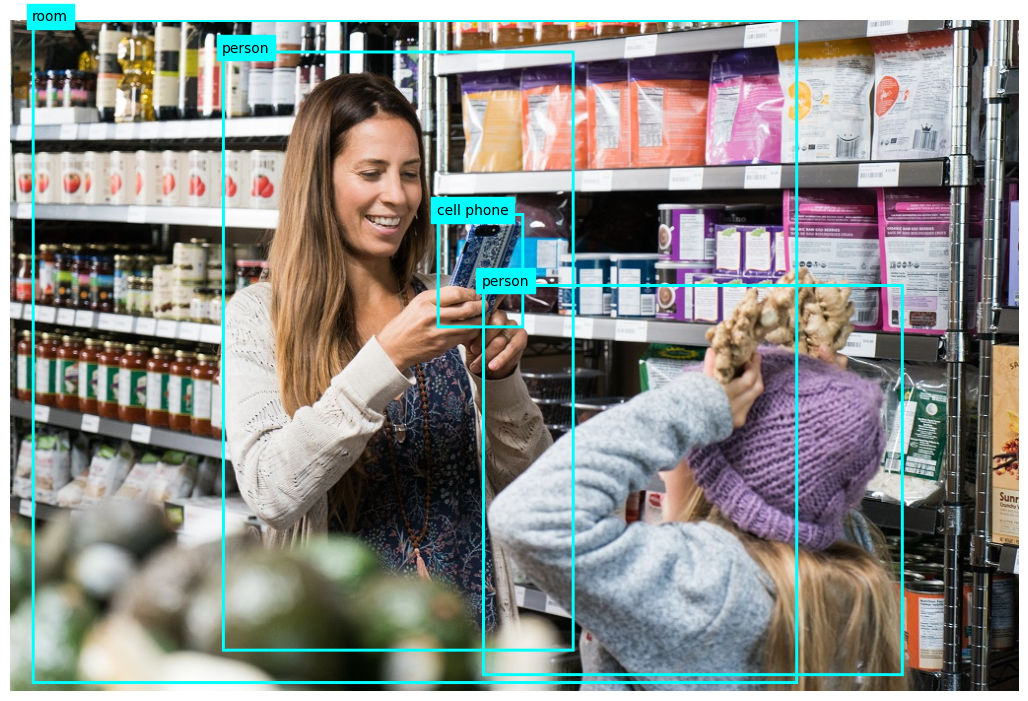

In [47]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

if analysis.objects is not None:
    print("\nObjects in image:")

    # Prepare image for drawing
    image = Image.open(image_url)
    fig = plt.figure(figsize=(image.width/100, image.height/100))
    plt.axis('off')
    draw = ImageDraw.Draw(image)
    color = 'cyan'

    for detected_object in analysis.objects:
        # Print object name
        print(" {} (confidence: {:.2f}%)".format(detected_object.object_property, detected_object.confidence * 100))

        # Draw object bounding box
        # r = detected_object.bounding_box
        bounding_box = ((detected_object.rectangle.x, detected_object.rectangle.y), (detected_object.rectangle.x + detected_object.rectangle.w, detected_object.rectangle.y + detected_object.rectangle.h)) 
        draw.rectangle(bounding_box, outline=color, width=3)
        plt.annotate(detected_object.object_property,(detected_object.rectangle.x, detected_object.rectangle.y), backgroundcolor=color)

    # Save annotated image
    plt.imshow(image)
    plt.tight_layout(pad=0)
    outputfile = r'C:\Projects\azure_ML_Experiments\images\analyzed_image.jpg'
    fig.savefig(outputfile)
    print('  Results saved in', outputfile)

In [42]:
analysis.objects

In [2]:
for word in "hi, my name is vishwas".split():
    print(word)

hi,
my
name
is
vishwas


In [1]:
import os
files = os.listdir(r"C:\Users\vishwas.balkundi\Downloads\articles")
files

['Article 1.txt',
 'Article 10.txt',
 'Article 11.txt',
 'Article 12.txt',
 'Article 13.txt',
 'Article 2.txt',
 'Article 3.txt',
 'Article 4.txt',
 'Article 5.txt',
 'Article 6.txt',
 'Article 7.txt',
 'Article 8.txt',
 'Article 9.txt']

In [3]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

In [4]:
pip install azure-ai-textanalytics==5.3.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

In [ ]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.language.questionanswering import QuestionAnsweringClient

In [6]:
pip install azure-ai-language-questionanswering

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install azure-cognitiveservices-speech==1.30.0

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 8.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install playsound==1.2.2


Note: you may need to restart the kernel to use updated packages.
